___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
df = pd.read_csv(filepath_or_buffer="advertising.csv")

**Check the head of ad_data**

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df["Area Income"].describe()

count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64

In [5]:
df["Area Income"].quantile(q=1)

79484.8

** Use info and describe() on ad_data**

In [6]:
len(df) - df.count()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

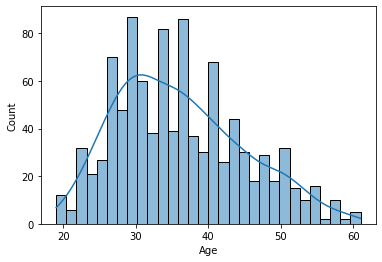

In [9]:
sns.histplot(data=df, x="Age", kde=True, bins=30)

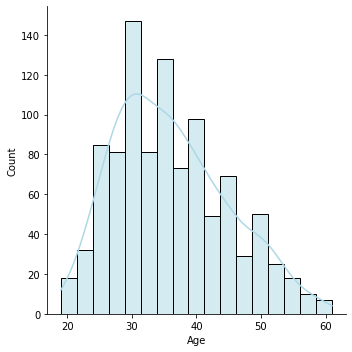

In [10]:
sns.displot(data=df, x="Age", kde=True, color="lightblue", edgecolor="black")

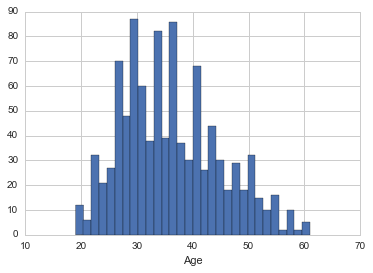

**Create a jointplot showing Area Income versus Age.**

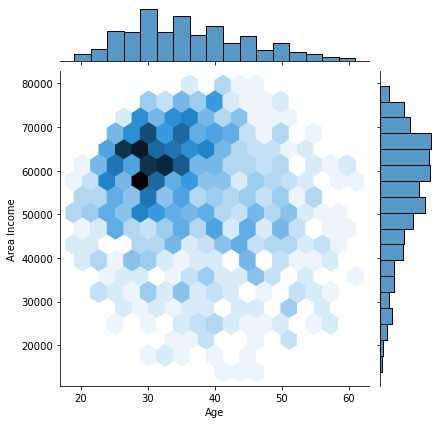

In [11]:
sns.jointplot(data=df, x="Age", y="Area Income", kind="hex")

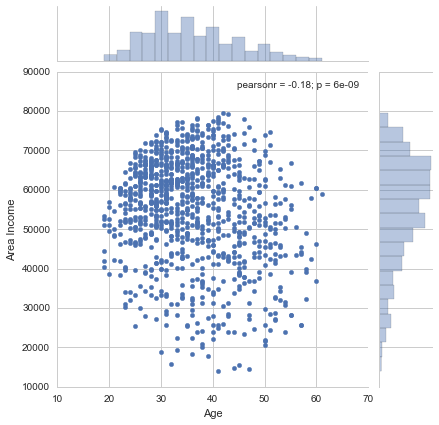

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

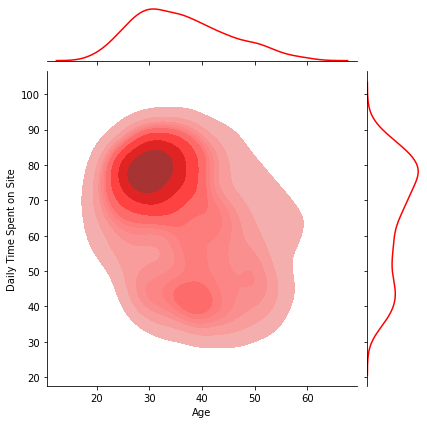

In [12]:
sns.jointplot(x="Age", y="Daily Time Spent on Site",data=df, kind="kde",
              color="red", shade=True)

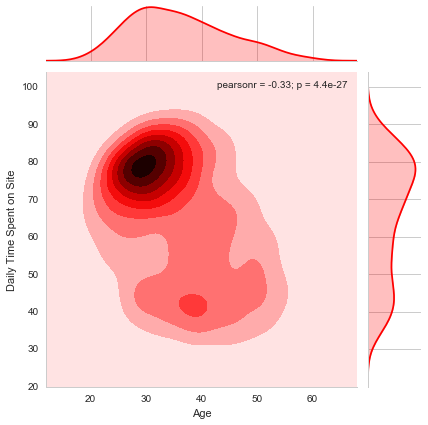

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

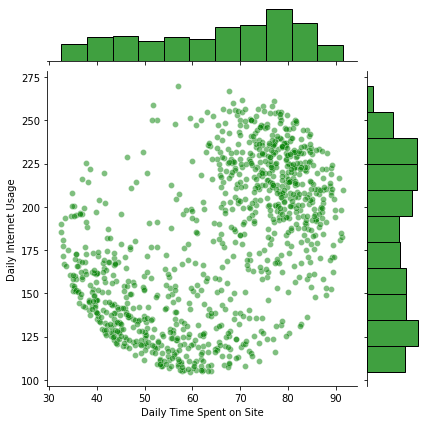

In [13]:
sns.jointplot(data=df, x="Daily Time Spent on Site", y="Daily Internet Usage", color="green",
              alpha=0.5)

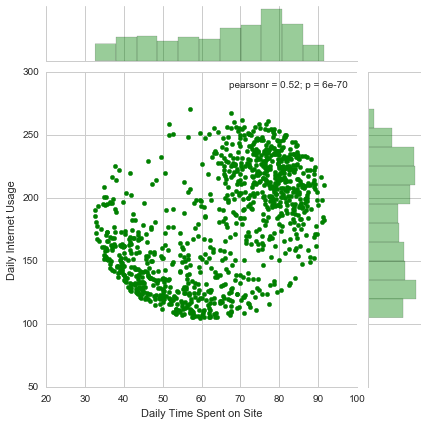

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

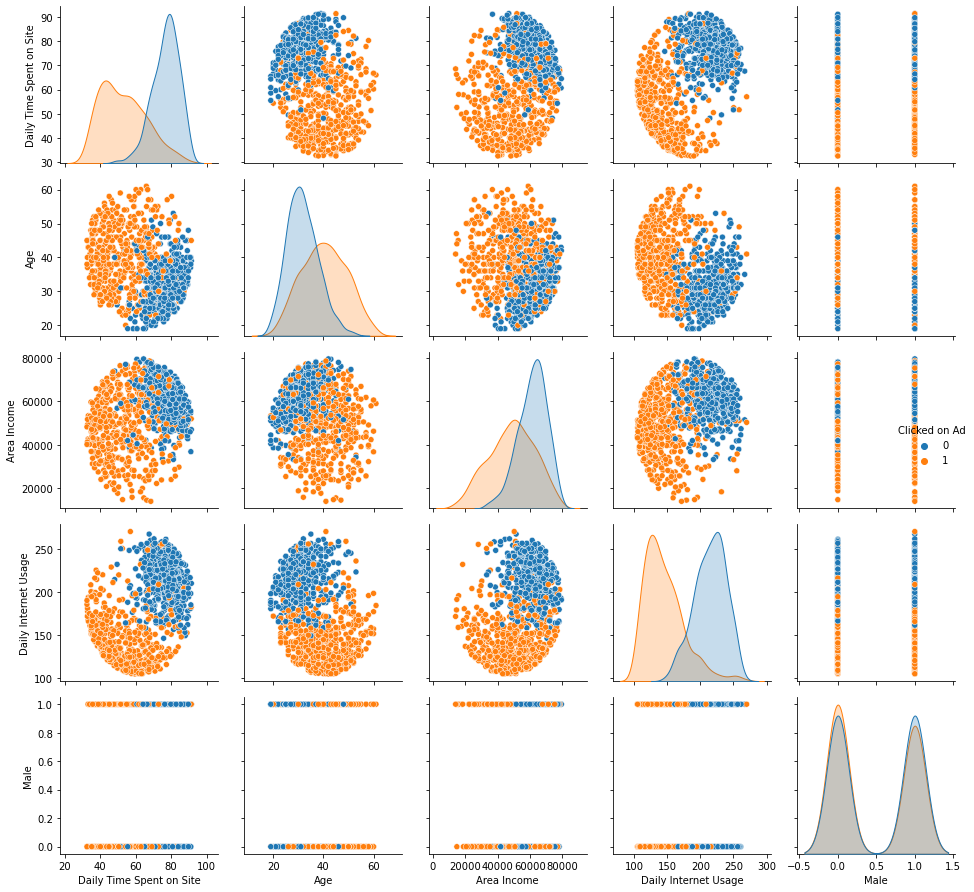

In [15]:
sns.pairplot(data=df, hue="Clicked on Ad")
plt.tight_layout()

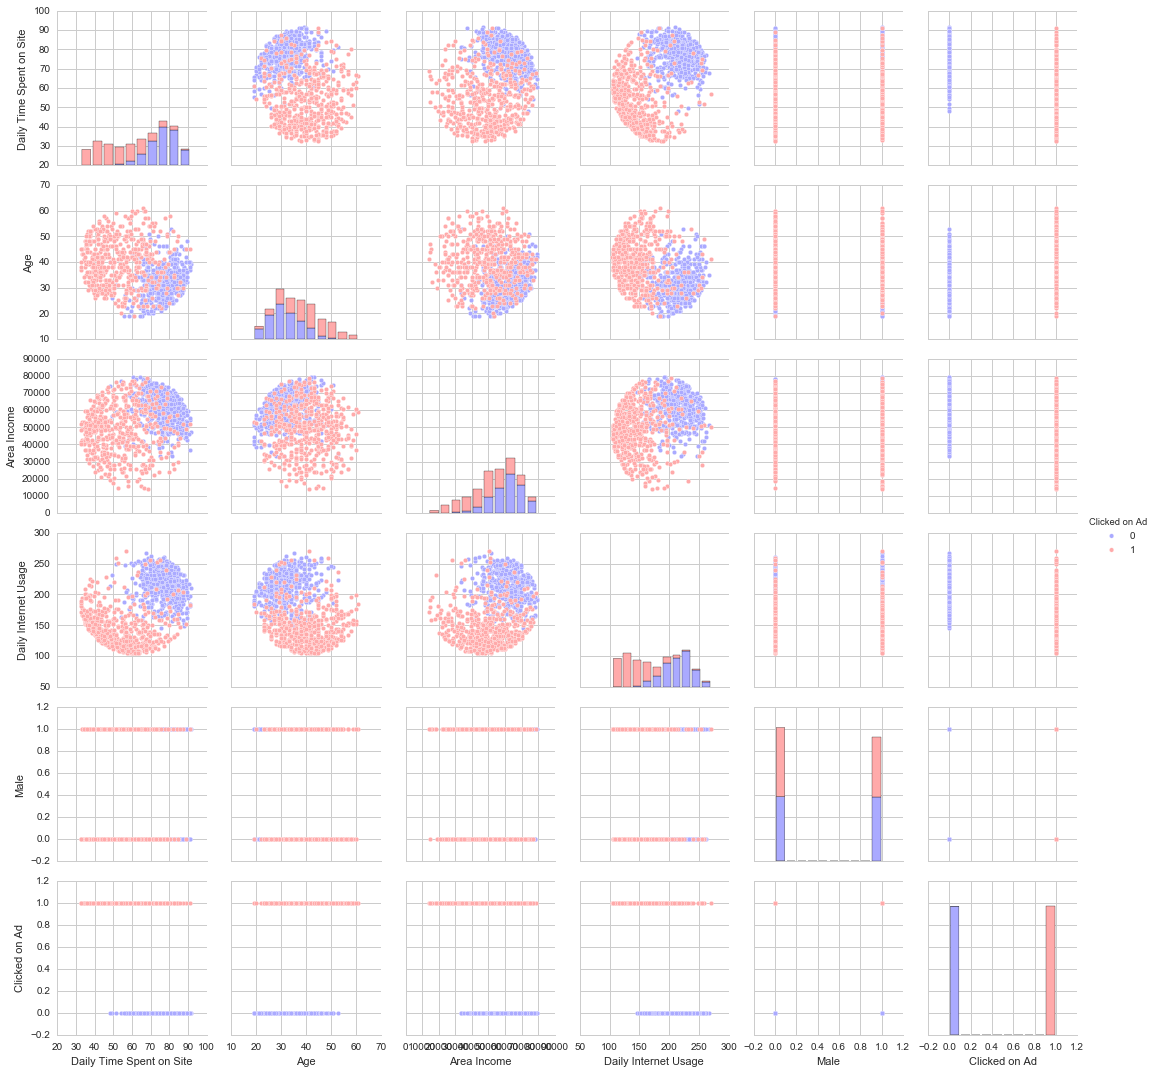

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [16]:
X = df.drop(columns=["Ad Topic Line" ,"Clicked on Ad", "City", "Country", "Timestamp"], 
            axis=1)
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [17]:
y = df["Clicked on Ad"]
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Train and fit a logistic regression model on the training set.**

In [25]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [26]:
logmodel = LogisticRegression()

In [27]:
logmodel.fit(X=X_train, y=y_train)

LogisticRegression()

In [28]:
logmodel.intercept_

array([0.00510587])

In [29]:
logmodel.coef_

array([[-5.12426791e-02,  2.36157646e-01, -9.89647744e-06,
        -2.46826887e-02,  1.07736310e-03]])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [30]:
predictions = logmodel.predict(X=X_test)
predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

** Create a classification report for the model.**

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_true=y_test, y_pred=predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_true=y_test, y_pred=predictions)

array([[149,   8],
       [ 14, 129]], dtype=int64)

## Great Job!

# Extra Linear Regression

In [35]:
linear_model = LinearRegression()

In [40]:
linear_model.fit(X=X_train, y=y_train)

LinearRegression()

In [41]:
linear_model.intercept_

2.35235484512842

In [42]:
linear_model.coef_

array([-1.25091658e-02,  8.21190809e-03, -5.82619578e-06, -5.54448513e-03,
       -2.97872902e-02])

In [46]:
predictions = linear_model.predict(X=X_test)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
MAE= mean_absolute_error(y_true=y_test, y_pred=predictions)
MAE

0.13561973915885026

In [69]:
MSE= mean_squared_error(y_true=y_test, y_pred=predictions)
MSE

0.039575842840154245

In [70]:
RMSE = np.sqrt(MSE)
RMSE

0.19893678101385437

In [71]:
pd.DataFrame(data=[MAE, MSE, RMSE], index=["MAE", "MSE", "RMSE"], columns=["Coefficients"])

,Coefficients
MAE,0.135620
MSE,0.039576
RMSE,0.198937


In [77]:
from sklearn.metrics import explained_variance_score, r2_score, rand_score

In [74]:
explained_variance_score(y_true=y_test, y_pred=predictions)

0.8415633553802793

In [75]:
r2_score(y_true=y_test, y_pred=predictions)

0.8413511266485287

---